In [1]:
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
train_data = torchvision.datasets.CIFAR10(root = "./data", train = True, transform = transform, download = True)

Files already downloaded and verified


In [11]:
test_data = torchvision.datasets.CIFAR10(root = "./data", train = False, transform = transform, download = True)

Files already downloaded and verified


In [13]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 32, shuffle = True, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 32, shuffle = True, num_workers = 2)

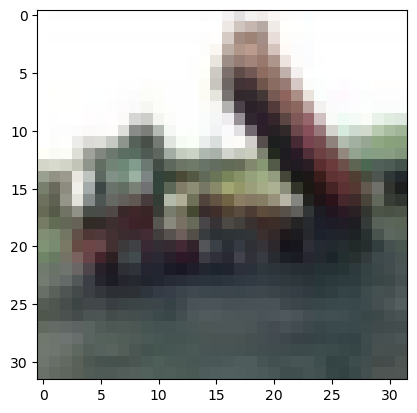

In [5]:
image, label = train_data[2]

# Undo normalization
image_org = image*0.5 + 0.5
plt.imshow(image_org.permute(1, 2, 0).numpy())
# plt.imshow(image.numpy().squeeze())


In [6]:
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        # input channel, output channel, kernel
        self.conv1 = nn.Conv2d(3, 12, 5)  # new shape: 12 channels with (32-5+1) = 28 x 28 size image
        self.pool = nn.MaxPool2d(2, 2) # divide shape by 2; shape is 12 (channels), 14 x 14
        self.conv2 = nn.Conv2d(12, 24, 5) # new shape: 24 channels, (14-5+1) = 10 x 10 size image
        # use pool again to divde shape by 2 -> 24 channels, 5 x 5 size image _> flatter to (24 * 5 * 5)
        self.fc1 = nn.Linear(24 * 5* 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
        

In [15]:
net = NeuralNet()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9) 
# optimizers handle parameter update after gradients are calculated through backpropagation

In [18]:
for epoch in range(30):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad() # clears old gradients

        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

In [19]:
torch.save(net.state_dict(), 'trained_net.pth')